<a href="https://colab.research.google.com/github/Jlucaas95/DesafioAnaliseExploratoria/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas Pandas e de Gráfico 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#Importando Arquivos
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [5]:
#Criando o dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
#Selecionando os 5 primeiros
df.head

<bound method NDFrame.head of     Data Venda Data Envio  ID Loja  ...            Marca   Classe    Cor
0   2008-05-09 2008-05-29      199  ...  Adventure Works  Regular    Red
1   2008-05-12 2008-05-17      306  ...  Adventure Works  Regular    Red
2   2008-05-14 2008-05-20      306  ...  Adventure Works  Regular    Red
3   2008-05-21 2008-05-27      306  ...  Adventure Works  Regular    Red
4   2008-06-20 2008-06-27      306  ...  Adventure Works  Regular    Red
..         ...        ...      ...  ...              ...      ...    ...
899 2008-03-22 2008-04-04      306  ...         Fabrikam  Regular  Black
900 2008-10-04 2008-10-15      306  ...         Fabrikam  Regular  Black
901 2008-12-11 2008-12-15      306  ...         Fabrikam  Regular  Black
902 2008-12-17 2008-12-21      306  ...         Fabrikam  Regular  Black
903 2008-12-21 2008-12-25      306  ...         Fabrikam  Regular  Black

[904 rows x 16 columns]>

In [7]:
#Informando a quantidade de linhas e colunas
df.shape

(904, 16)

In [8]:
#Verificando os tipos de dados na tabela
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
#Qual o valor da Receita total ?
df["Valor Venda"].sum()

5984606.1426

In [11]:
#Qual é o custo total ?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) 

In [12]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [14]:
#Qual o custo total ?
round(df["custo"].sum(), 2)

2486783.05

In [15]:
#Coluna de lucro total

df["Lucro"] = df["Valor Venda"] - df["custo"]

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [17]:
#Lucro total
round(df["Lucro"].sum(), 2)

3497823.09

In [18]:
#Tempo de envio da Mercadoria

df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [20]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [21]:
#Média de tempo por Marca
df.groupby("Marca")["Tempo_Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

In [22]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

In [23]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [24]:
Lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
Lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


In [26]:
#Qual o total de produtos vendidos ?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

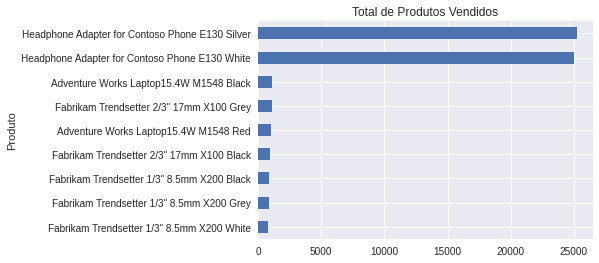

In [27]:
#Grafico Total de produtos vendidos 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")

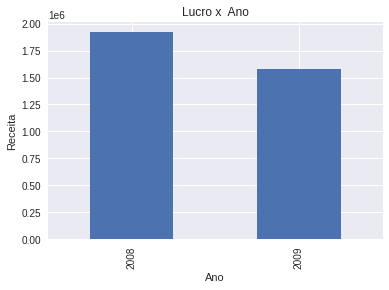

In [29]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x  Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [30]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

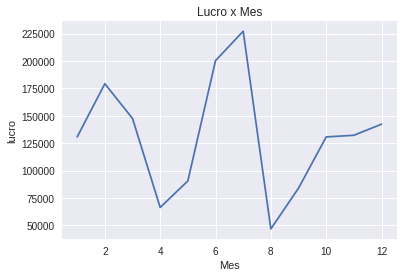

In [35]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title= "Lucro x Mes")
plt.xlabel("Mes")
plt.ylabel("lucro");

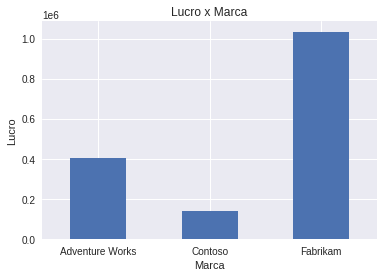

In [45]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal");

In [39]:
df["Tempo_Envio"].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Tempo_Envio, dtype: float64

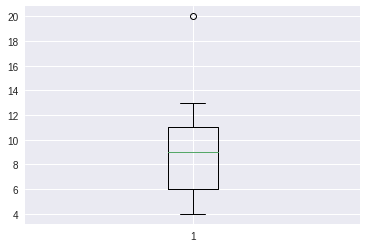

In [41]:
#Grafico de Boxplot
plt.boxplot(df["Tempo_Envio"]);

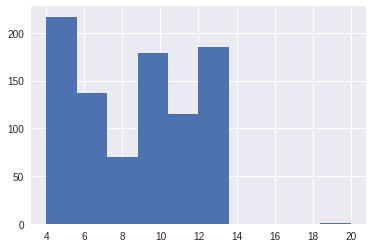

In [44]:
#Histograma
plt.hist(df["Tempo_Envio"]);

In [46]:
#Tempo minimo de envio
df["Tempo_Envio"].min()

4

In [47]:
#Tempo máximo de envio
df["Tempo_Envio"].max()

20

In [49]:
#Identificando o Outlier
df[df["Tempo_Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [50]:
df.to_csv("df_vendas_novo.csv", index=False)